# Problem 2.20

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 2**

**Problem 2.20**

**Using pvlib-python, satellite data from PVGIS, and assuming a PV installation located in Wellington, New Zealand (41°17′20″ S, 174°46′38″ E):**

**(a) Calculate the interannual variability of the daily solar horizontal irradiation $G_d(0)$ on March 21**

**(b) Calculate the interannual variability of the monthly mean of the daily solar horizontal irradiation $G_{dM}(0)$ in March.**

**(c) Calculate the interannual variability of the annual mean of the daily solar horizontal irradiation $G_{dY}(0)$.**

**(d) Discuss the previous results.**


We start by importing several packages that will be useful, including [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import requests
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

We define a function to retrieve data from PVGIS.
More details regarding how to download data from PVGIS using an APi can be found in [PVGIS API](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/getting-started-pvgis/api-non-interactive-service_en)

In [2]:
def read_radiation_pvgis(raddatabase, lat, lon):
    params = {'lat': lat, 
              'lon': lon, 
              'browser': 1, 
              'outputformat': 'csv', 
              'raddatabase': raddatabase}
    
    series_file = Path(f'data/anual_series_{lat}_{lon}_{raddatabase}.csv')

    if not series_file.exists():
        resp_series = requests.get('https://re.jrc.ec.europa.eu/api/v5_2/seriescalc', params=params)
        with open(series_file, 'wb') as f:
            f.write(resp_series.content)
    
    series = pd.read_csv(series_file, 
                         skiprows=8, 
                         index_col='time', 
                         skipfooter=10, 
                         engine='python',
                         parse_dates=True, 
                         date_format='%Y%m%d:%H%M')
    
    series = series.rename({'G(i)': 'ghi'}, axis='columns')
    series['hour'] = series.index.hour

    return series

We start by defining the location and downloading reanalysis data from PVGIS.

In [3]:
latitude, longitude = -41.29, 174.77 # Wellington, New Zealand
satellite = read_radiation_pvgis(raddatabase='PVGIS-ERA5', lat=latitude, lon=longitude)

We calculate the irradiation in every day (the value corresponding to March 21), the average daily irradiation in March and the annually-average daily irradiation. 

C:\Users\marta\AppData\Local\Temp\ipykernel_10016\4187869286.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  satellite_days.resample('M').mean()[satellite_days.resample('M').mean().index.month == 3].ghi.plot(ax=ax, label='Average daily irradiation in March', marker='o')
C:\Users\marta\AppData\Local\Temp\ipykernel_10016\4187869286.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  satellite_days.resample('Y').mean().ghi.plot(ax=ax, label='Annually average daily irradiation', marker='o')


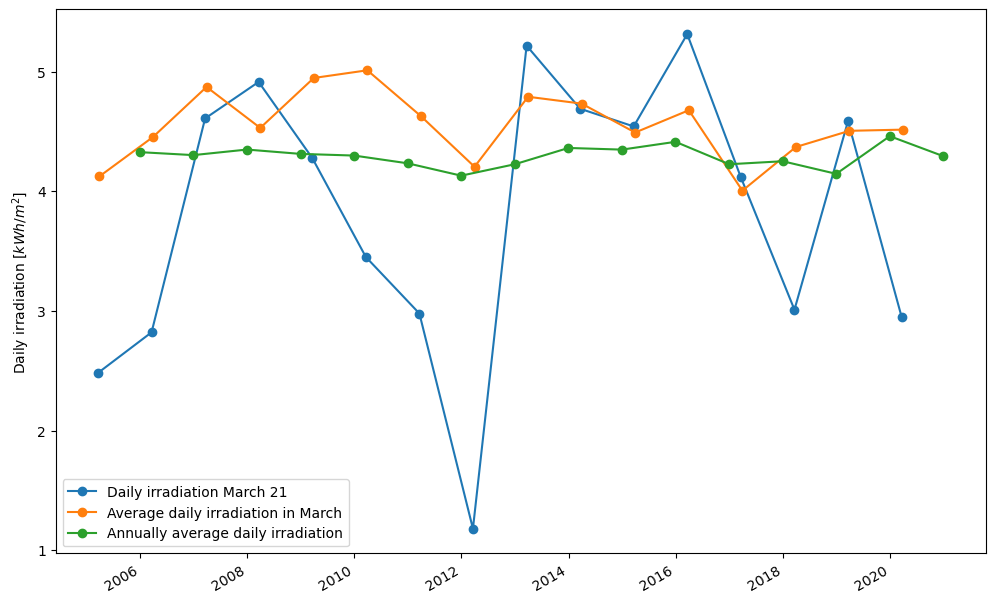

In [4]:
satellite_days = satellite.resample('D').sum() /1000 # kWh

# Variability vs time-aggregation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

satellite_days[satellite_days.index.dayofyear == 80].ghi.plot(ax=ax, label='Daily irradiation March 21', marker='o') #March 21 corresponds to day 80
satellite_days.resample('M').mean()[satellite_days.resample('M').mean().index.month == 3].ghi.plot(ax=ax, label='Average daily irradiation in March', marker='o')
satellite_days.resample('Y').mean().ghi.plot(ax=ax, label='Annually average daily irradiation', marker='o')
ax.set_ylabel('Daily irradiation [$kWh/m^2$]')
ax.set_xlabel('')
ax.legend()

In [9]:
day_mean = satellite_days[satellite_days.index.dayofyear == 80].ghi.mean()
day_std_n = 100*satellite_days[satellite_days.index.dayofyear == 80].ghi.std()/satellite_days[satellite_days.index.dayofyear == 80].ghi.mean()

month_mean = satellite_days.resample('ME').mean()[satellite_days.resample('ME').mean().index.month == 3].ghi.mean()
month_std_n = 100*satellite_days.resample('ME').mean()[satellite_days.resample('ME').mean().index.month == 3].ghi.std()/satellite_days.resample('ME').mean()[satellite_days.resample('ME').mean().index.month == 3].ghi.mean()

year_mean = satellite_days.resample('YE').mean().ghi.mean()
year_std_n = 100**satellite_days.resample('YE').mean().ghi.std()/satellite_days.resample('YE').mean().ghi.mean()

print(f'Average daily irradiation 21 March= {round(day_mean,2)} kWh/m2')
print(f'Normalized standard deviation for daily irradiation 21 March= {round(day_std_n,1)} %')

print(f'Average daily irradiation in March= {round(month_mean)} kWh/m2')
print(f'Normalized standard deviation for average daily irradiation in March= {round(month_std_n,1)} %')

print(f'Anually-average daily irradiation = {round(year_mean)} kWh/m2')
print(f'Normalized standard deviation for nnually-average daily irradiation= {round(year_std_n,1)} %')


Average daily irradiation 21 March= 3.82 kWh/m2
Normalized standard deviation for daily irradiation 21 March= 30.4 %
Average daily irradiation in March= 5 kWh/m2
Normalized standard deviation for average daily irradiation in March= 6.3 %
Anually-average daily irradiation = 4 kWh/m2
Normalized standard deviation for nnually-average daily irradiation= 0.4 %


The analysis of the data shows that:

(i) there is high interannual variability for the daily irradiation on March 21, hence it is difficult to forecast the output of a PV system on a specific day

(ii) the interannual variability is lower when we look at the average daily irradiation in March, hence it would be easier to forecast the monthly value of irradiation 

(iii) the interannual variability of the annually-averaged daily irradiation is significantly lower indicating that there would be significantly less uncertainty when forecasting annual electricity generation from a PV installation than when trying to forecast the electricity output on a particular date.